In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

### Dataset
    We will use IRIS dataset. It has 150 instances with 4 features:

    1.Sepal Length
    2.Sepal Width
    3.Petal Length
    4.Petal Width
    
    from 3 classes:

    *Iris-setosa
    *Iris-versicolor
    *Iris-virginica

In [4]:
# Importing the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#gives information about the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
#tells us about no. of rows and column [rows , columns]
df.shape 


(150, 6)

In [16]:
#droping  id becuase it is no use to us , Inplace = True means changes will take effect in original dataframe
df.drop("Id",axis=1,inplace=True)   
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization

<AxesSubplot:ylabel='None'>

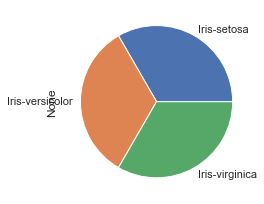

In [17]:
df.groupby(by = 'Species').size().plot(kind = 'pie', figsize = (3.5, 3.5))


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

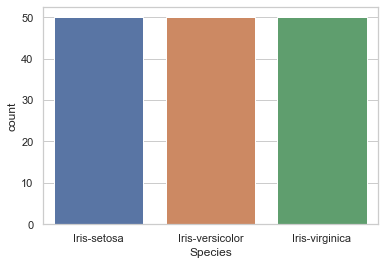

In [18]:
print(df['Species'].value_counts())
sns.countplot(df['Species'])

<AxesSubplot:ylabel='Density'>

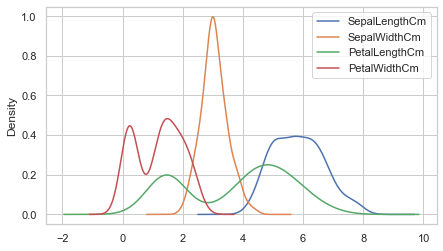

In [19]:
df.plot(kind = 'kde', figsize = (7, 4))

<AxesSubplot:xlabel='Species'>

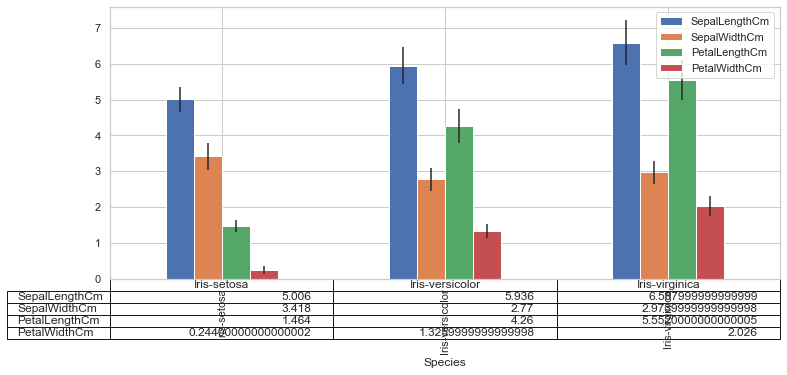

In [23]:
groups = df.groupby(by = 'Species')
means, sds = groups.mean(), groups.std()
means.plot(yerr = sds, kind = 'bar', figsize = (12, 5), table = True)

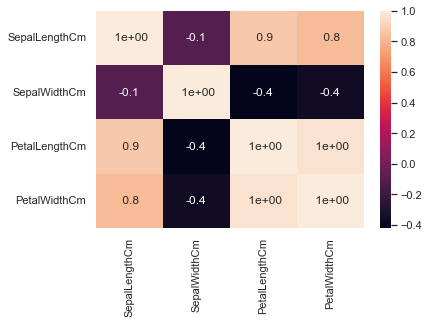

In [20]:
plt.figure(figsize=(6,4)) 
sns.heatmap(df.corr(),annot=True,fmt=" .00") #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

### Observation

    The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

    We will use all the features for training the algorithm and check the accuracy.

    Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

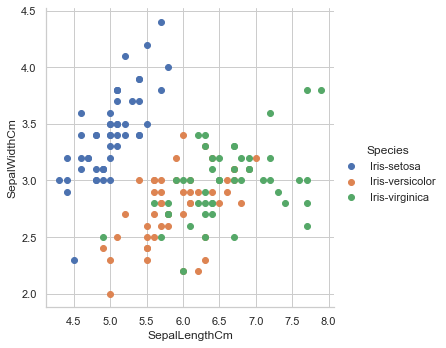

In [21]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

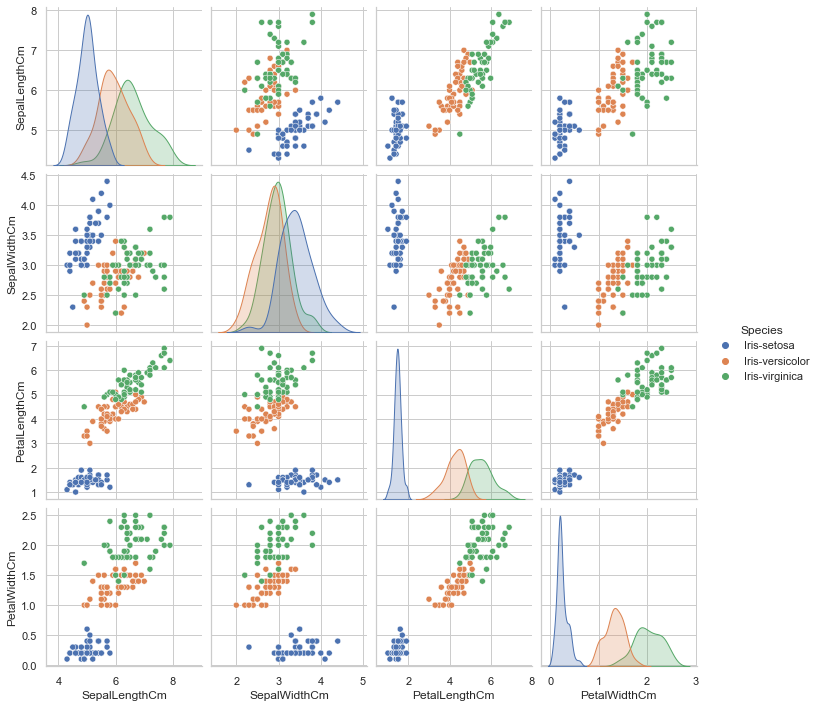

In [10]:
#let Create a pair plot of some columns 
sns.pairplot(df.iloc[:,:],hue='Species')  # graph also  tell us about the the realationship between the two columns 

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

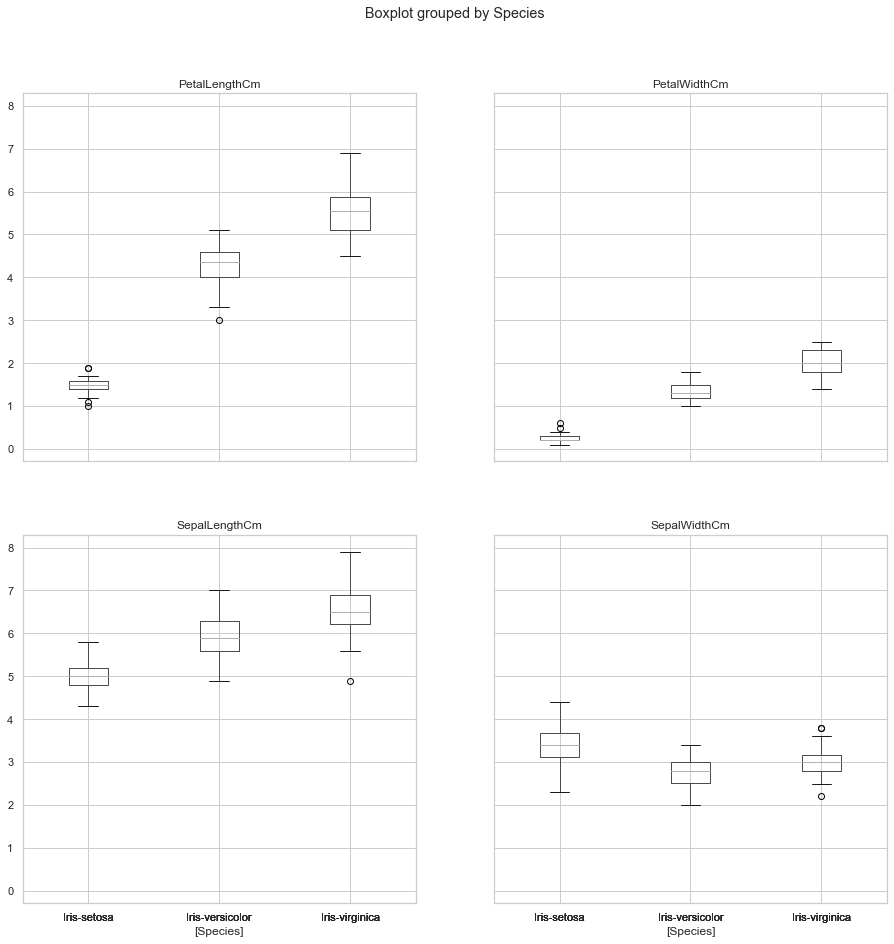

In [11]:
# We can quickly make a boxplot with Pandas on each feature split out by species
df.boxplot(by="Species", figsize=(15,15))

    Steps To Be followed When Applying an Algorithm
    Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it 
    will help in tAraining the model better.
    Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
    Then pass the training dataset to the algorithm to train it. We use the .fit() method
    Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
    We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [12]:
# importing alll the necessary packages to Logistic Regression 
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

In [13]:
X=df.iloc[:,0:4]
Y=df["Species"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


In [15]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9736842105263158
